In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LSTM, Embedding
from tensorflow.keras.utils import Sequence
from tensorflow.keras.optimizers import Adam

In [ ]:
# store csv contents in dataframe
file_path = "/content/Tweets.csv"

df = pd.read_csv(file_path)

In [ ]:
# remove all other columns
df = df[['text', 'airline_sentiment']].dropna()

In [ ]:
# categorical labels converted to integer labels
# neutral, positive, negative => 0 and 1 and 2
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['airline_sentiment'])

# converts labels into vectors
y = to_categorical(y)

In [ ]:
tokenizer = Tokenizer(oov_token=1)
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
# max length of tweet in words
max_length = 30
epochs = 20

In [ ]:
# add padding (zeroes) at the end
X = np.array(pad_sequences(sequences, maxlen=max_length, padding='post'))

In [ ]:
#split into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#split training data into train and validtion data
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')> 0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
from tensorflow.keras.optimizers import Adam

#Building the base_model
base_model = Sequential([
  Embedding(vocab_size, 100, input_length=max_length-1),
  LSTM(32, activation='tanh', input_shape=(max_length, vocab_size), return_sequences=True),
  LSTM(32, activation='tanh', input_shape=(max_length, vocab_size)),
  Dense(256, activation='relu'),
  Dense(3, activation='softmax')])
base_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

history = base_model.fit(X_train, Y_train, epochs=epochs, verbose=1, validation_data=(X_val, Y_val), callbacks=callbacks)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


293/293 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6497 - loss: 0.8306 - val_accuracy: 0.7175 - val_loss: 0.6395
Epoch 2/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7955 - loss: 0.4919 - val_accuracy: 0.7388 - val_loss: 0.6457
Epoch 3/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8604 - loss: 0.3644 - val_accuracy: 0.7678 - val_loss: 0.6603
Epoch 4/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9220 - loss: 0.2358 - val_accuracy: 0.7764 - val_loss: 0.6718
Epoch 5/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9475 - loss: 0.1735 - val_accuracy: 0.7537 - val_loss: 0.9235
Epoch 6/100
291/293 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9498 - loss: 0.1524
Reached 95% accuracy so cancelling training!
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9498 - loss: 0.1524 - val_accuracy: 0.7636 - val_loss: 0.8686


In [ ]:
base_model.evaluate(X_test, Y_test)

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7549 - loss: 0.8861


[0.8487845063209534, 0.7653688788414001]

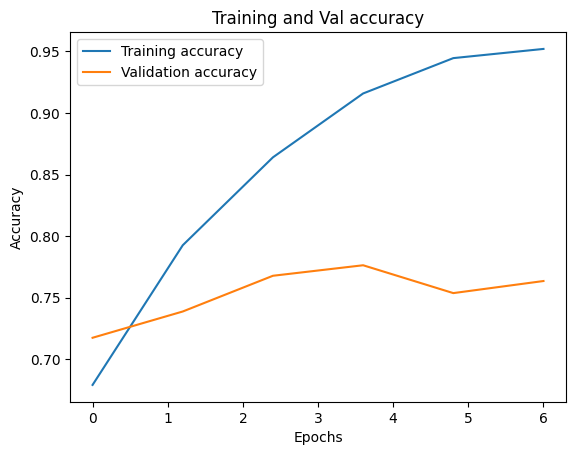

In [ ]:
plt.plot(np.linspace(0, len(history.history['accuracy']), len(history.history['accuracy'])), history.history['accuracy'], label='Training accuracy')
plt.plot(np.linspace(0, len(history.history['val_accuracy']), len(history.history['val_accuracy'])), history.history['val_accuracy'], label = 'Validation accuracy')
plt.title('Training and Val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()